In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('hotels_with_property.csv')
dataset.head()

,name,rating,Free parking,Free High Speed Internet (WiFi),Pool,Fitness Center with Gym / Workout Room,Free breakfast,Bicycle rental,Bicycles available,Kids stay free,...,Complimentary Instant Coffee,Sun terrace,Washing machine,Free private parking nearby,Private bathrooms,Whirlpool bathtub,Shared bathroom,Internet,Mosquito net,Shops
0,Mercure Jakarta Pantai Indah Kapuk,5.0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Veranda Hotel at Pakubuwono,4.5,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Swissotel Jakarta PIK Avenue,5.0,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,eL Hotel Royale Jakarta,4.5,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Hotel Ciputra Jakarta managed by Swiss-Belhote...,4.5,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Free parking', ylabel='rating'>

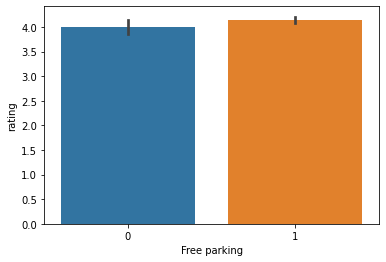

In [30]:
# correlation between rating and Free parking
sns.barplot(x='Free parking', y='rating', data=dataset)

In [3]:
df = dataset.drop(columns=['name'])
df.head()

,rating,Free parking,Free High Speed Internet (WiFi),Pool,Fitness Center with Gym / Workout Room,Free breakfast,Bicycle rental,Bicycles available,Kids stay free,Blackout curtains,...,Complimentary Instant Coffee,Sun terrace,Washing machine,Free private parking nearby,Private bathrooms,Whirlpool bathtub,Shared bathroom,Internet,Mosquito net,Shops
0,5.0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4.5,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4.5,1,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4.5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
le = LabelEncoder()

df['rating'] = le.fit_transform(df['rating'])
df['rating'].unique()

array([7, 6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [18]:
X = df.iloc[:, 1:10]
y = df['rating']
X

,Free parking,Free High Speed Internet (WiFi),Pool,Fitness Center with Gym / Workout Room,Free breakfast,Bicycle rental,Bicycles available,Kids stay free,Blackout curtains
0,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,0,0,1,0
2,1,1,1,1,1,0,0,1,1
3,1,1,1,1,1,0,0,1,1
4,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
398,0,1,0,0,0,0,0,0,1
399,0,1,0,0,0,0,0,0,0
400,1,1,0,0,1,0,0,0,0
401,1,1,1,1,0,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
nb = GaussianNB()
nb.fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [21]:
models = [logreg, knn, nb, rf, svc]

scores = []

for model in models:
    scores.append(model.score(X_test, y_test))

evaluation_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'Random Forest', 'SVC'],
    'Score': scores
})

evaluation_metrics.head()

,Model,Score
0,Logistic Regression,0.444444
1,KNN,0.308642
2,Naive Bayes,0.074074
3,Random Forest,0.395062
4,SVC,0.395062


In [9]:
y_pred = model.predict(X_test)
#evaluate y pred and y train
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  3,  1,  0],
       [ 0,  0,  0, 15,  1,  0],
       [ 0,  0,  0, 21,  5,  1],
       [ 0,  0,  0, 13, 11,  4],
       [ 0,  0,  1,  2,  2,  0]], dtype=int64)